## Introduction
In this project,we are creating different machine learning model to predicated 
mashroom is poisons or ediable

# Dataset
we are use mashroom.csv dataset that contain 8124 row and 22 column that dataset we are download Kaggle website
# Use Librarires
In this project we are use below library to import
* Numpy
* pandas
* matplotlib
* seaborn
* sklearn
* graphiviz


* Importing all libary and package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import os
import graphviz

* Reading csv file using pandas libary

In [52]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [53]:
df.shape

(8124, 23)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [55]:
df['class'].unique()

array(['p', 'e'], dtype=object)

* In this class column showing 'p' are poisonous and 'e' are ediable 

 class column poisonable mashroom are '4208' and ediable are  '3916'

In [56]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [57]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In this dataset we are check any nan value are preset using isnull() method and shoing no 
null value in this dataset

In [58]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Descriptive Statstics 
* count -- counting the response
* unique -- counting the unique value in the column
* top -- shwoing number of highest-occuring value
* freq -- show the frequecy/counting highest-occuring categorical value


In [59]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# showing the categrotry of each column

In [60]:
for column in df.columns:
  print(f"{column} unique value :- {df[column].unique()}")

class unique value :- ['p' 'e']
cap-shape unique value :- ['x' 'b' 's' 'f' 'k' 'c']
cap-surface unique value :- ['s' 'y' 'f' 'g']
cap-color unique value :- ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises unique value :- ['t' 'f']
odor unique value :- ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment unique value :- ['f' 'a']
gill-spacing unique value :- ['c' 'w']
gill-size unique value :- ['n' 'b']
gill-color unique value :- ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape unique value :- ['e' 't']
stalk-root unique value :- ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring unique value :- ['s' 'f' 'k' 'y']
stalk-surface-below-ring unique value :- ['s' 'f' 'y' 'k']
stalk-color-above-ring unique value :- ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring unique value :- ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type unique value :- ['p']
veil-color unique value :- ['w' 'n' 'o' 'y']
ring-number unique value :- ['o' 't' 'n']
ring-type unique value :- ['p' 'e' 'l

# data visualize

*  below bar graphi shoing Number of Posine /ediable count

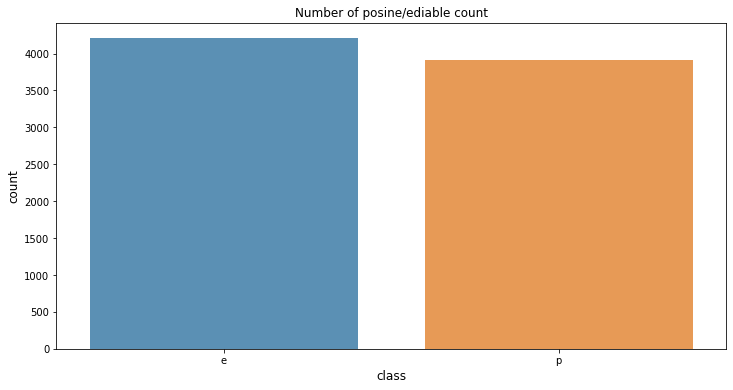

In [61]:
count =df['class'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(count.index,count.values,alpha=0.8)
plt.title("Number of posine/ediable count")
plt.xlabel('class',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.show()

 Count.index represent the unique values i.e 'e' and 'p' and count_index <br>
 4208 are ediable and 3916 are poisone showing upper bar chart

# Data Manipulation
The data are in category we are convert to ordinal.<br>
As we know our data are present object data type so we are convert object to category datatype using 'astype()' method

In [62]:
df=df.astype("category")
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

* Convert category column to label coding 

In [63]:
labelencoder=LabelEncoder()
for column in df.columns:
  df[column]=labelencoder.fit_transform(df[column])

* after transforming categoriy to ordinal speicafical class are posinoal are value are <br>
'1' and ediable are '0'

In [64]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


As we can see veil type are all row are 0 so we are drop this cloumn

In [69]:
df['veil-type'].sample(5)

6684    0
1380    0
784     0
686     0
4725    0
Name: veil-type, dtype: int32

In [70]:
df=df.drop(['veil-type'],axis=1)

# showing Corrlation between each column to possiablity possiable or ediable useing heatmap

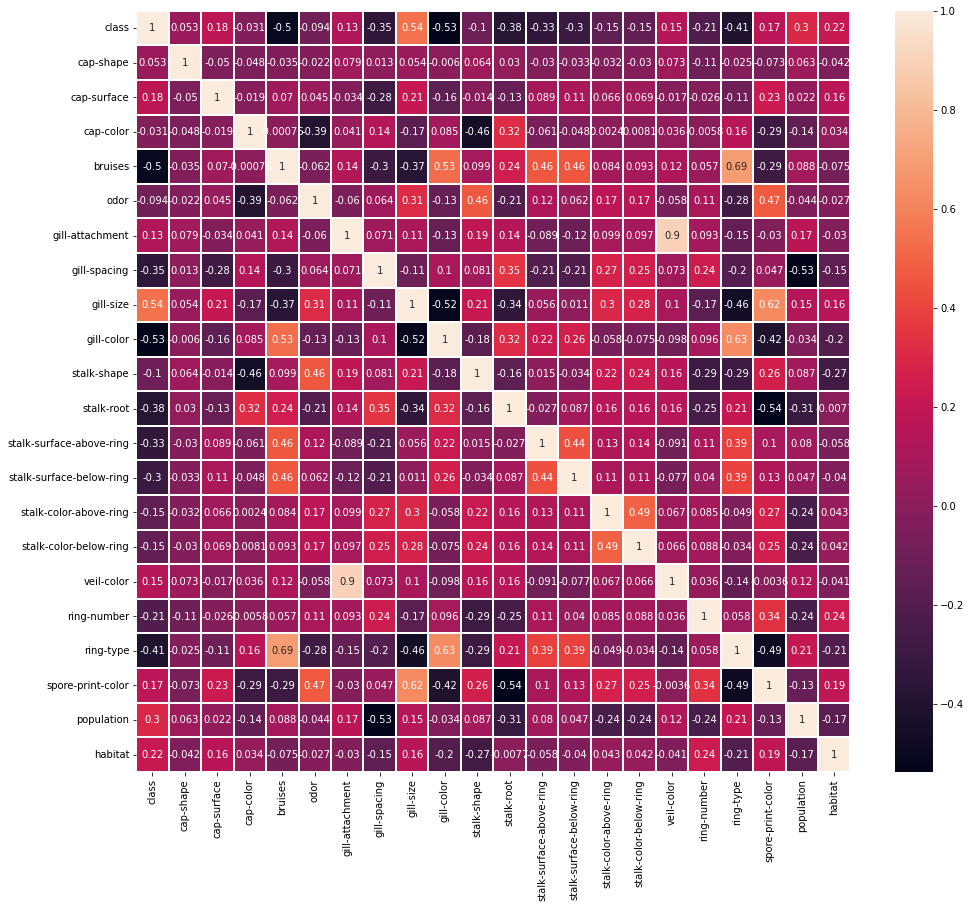

In [71]:
plt.figure(figsize=(16,14));
sns.heatmap(df.corr(),linewidths=.1,annot=True);


The least correlation variable is the most important one for classfication <br>
In this case ,"gill-color" is -0.53 so let's look at it closely.

In [72]:
df[['class','gill-color']].groupby(['gill-color'],as_index=False).mean().sort_values(by='class',ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


In [73]:
df[['class','cap-shape']].groupby(['cap-shape'],as_index=False).mean().sort_values(by='class',ascending=False)

,cap-shape,class
1,1,1.000000
3,3,0.724638
2,2,0.493655
5,5,0.467177
0,0,0.106195
4,4,0.000000


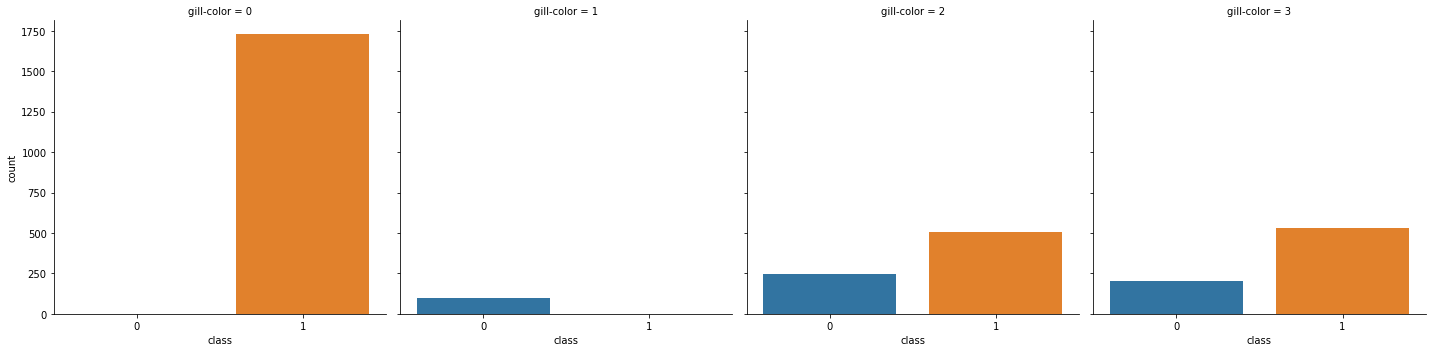

In [74]:
new_var = df[['class','gill-color']]
new_var=new_var[new_var['gill-color']<=3]

sns.factorplot('class',col='gill-color',data=new_var,kind='count');


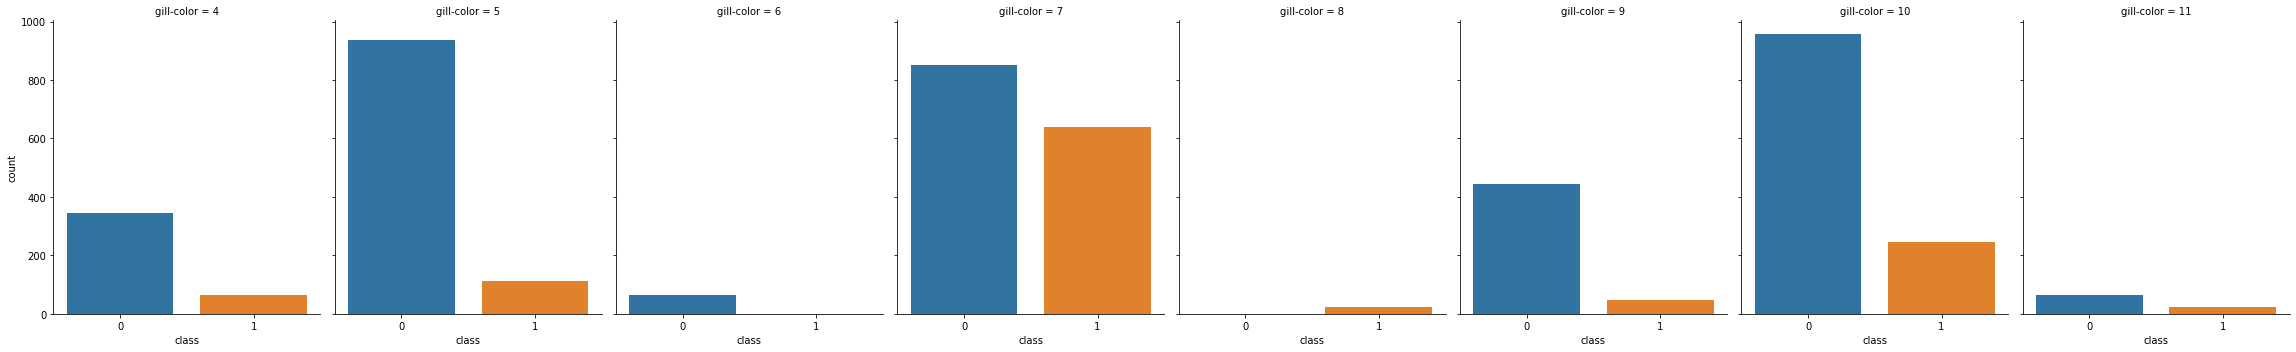

In [75]:
new_var = df[['class',"gill-color"]]
new_var=new_var[new_var['gill-color']>=4]
sns.factorplot('class',kind='count',data=new_var,col='gill-color',aspect=.8)

## Preparing data 

 splitting data in two dataframe train and test.
 to train our Ml model 

In [76]:
X=df.drop(['class'],axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [77]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=25,test_size=0.1)

**Classification Methods**

1. Decision Tree Classification

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

# Feature Importance
* before all method examinied the most importance feature is 'gill-color'

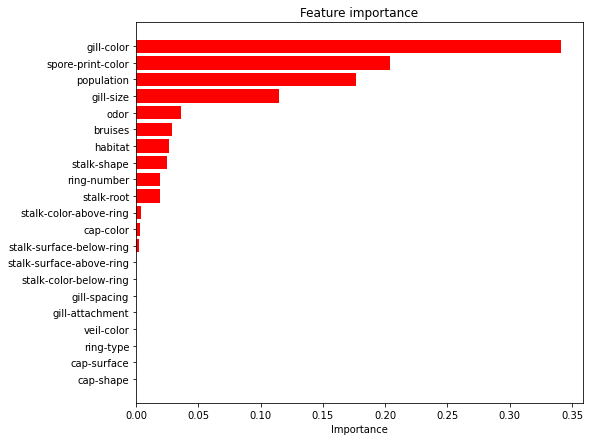

In [78]:
feature_list=X.columns.values
feature_importance=dt.feature_importances_
sorted_idx=np.argsort(feature_importance)
plt.figure(figsize=(8,7))

plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx],
         align='center',color='red')
plt.yticks(range(len(sorted_idx)),feature_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

# Predicting and estimating the result

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,auc,roc_curve
y_pre_dt=dt.predict(x_test)

print("Decision Tree classifier report: \n\n",
      classification_report(y_test,y_pre_dt))
print("test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       1.00      1.00      1.00       383

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

test Accuracy:100.0%


#Confusion Matrix for Descision Tree classifer

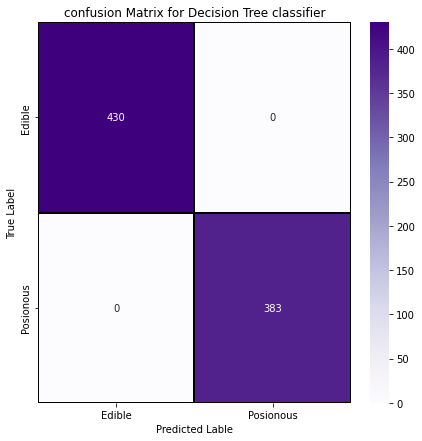

In [27]:
cm=confusion_matrix(y_test,y_pre_dt)
x_axis_label=["Edible","Posionous"]
y_axis_label=["Edible","Posionous"]
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor="black",fmt=".0f",ax=ax,
            cmap="Purples",xticklabels=x_axis_label,
            yticklabels=y_axis_label)
plt.xlabel("Predicted Lable")
plt.ylabel("True Label")
plt.title('confusion Matrix for Decision Tree classifier')
plt.show()

2.Logistic Regression Classification

In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver="lbfgs",max_iter=500)
lr.fit(x_train,y_train)
print(f"Test Accuracy {round(lr.score(x_test,y_test)*100,2)}")

Test Accuracy 95.94


#Classification report of Logistic Regression Classifier

In [29]:
y_pred_lr=lr.predict(x_test)
print("Logistic Regression Classifier report : \n\n",
      classification_report(y_test,y_pred_lr))

Logistic Regression Classifier report : 

               precision    recall  f1-score   support

           0       0.96      0.97      0.96       430
           1       0.96      0.95      0.96       383

    accuracy                           0.96       813
   macro avg       0.96      0.96      0.96       813
weighted avg       0.96      0.96      0.96       813



**Confusion Matrix for logistic regression CLassifier**

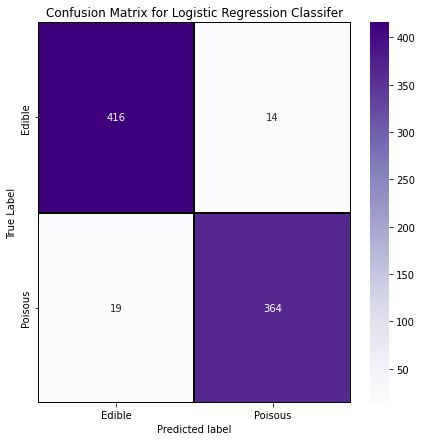

In [30]:
cm=confusion_matrix(y_test,y_pred_lr)
x_axis_labels=["Edible","Poisous"]
y_axis_labels=["Edible","Poisous"]
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor="black",
            fmt=".0f",ax=ax,cmap="Purples",xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Classifer")
plt.show()

**KNN Classification**

In [31]:
from sklearn.neighbors import KNeighborsClassifier
best_kvalue=0
best_score=0
for i in range(1,10):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  if knn.score(x_test,y_test)>best_score:
    best_score=knn.score(x_train,y_train)
    best_kvalue=i
print(f"Best Knn value: {best_kvalue}")
print(f"Test Accuracy: {round(best_score*100,2)}")

Best Knn value: 1
Test Accuracy: 100.0


**Classification Report of Knn Classifer**

In [32]:
y_pred_knn=knn.predict(x_test)
print("Knn Classifier report :\n\n",classification_report(y_test,y_pred_knn))

Knn Classifier report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       1.00      1.00      1.00       383

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



**Confusion Matrix For KNN classifier**

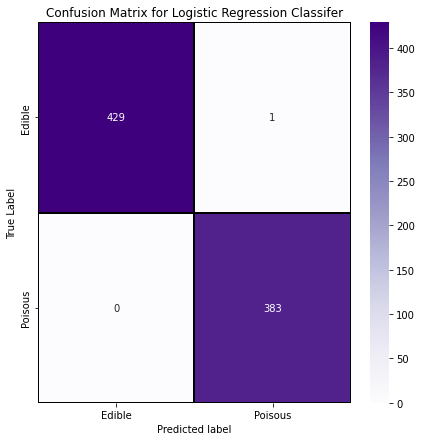

In [33]:
cm=confusion_matrix(y_test,y_pred_knn)
x_axis_labels=["Edible","Poisous"]
y_axis_labels=["Edible","Poisous"]
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor="black",
            fmt=".0f",ax=ax,cmap="Purples",xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Classifer")
plt.show()


4.SVM classification

In [34]:
from sklearn.svm import SVC
svm=SVC(random_state=42,gamma="auto")
svm.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


**Classification Report of SVM classifier**

In [35]:
y_pred_svm=svm.predict(x_test)
print("SVM classifier report: \n\n",classification_report(y_test,y_pred_svm))

SVM classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       1.00      1.00      1.00       383

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



**Confusion Matrix for SVM Classifier**

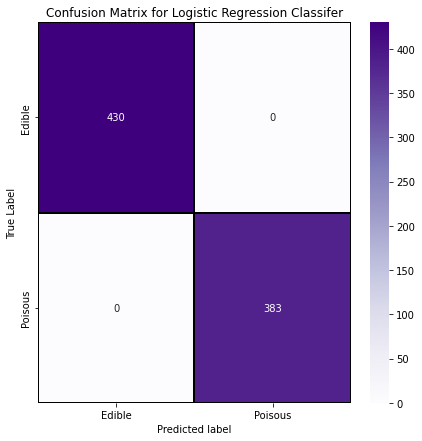

In [36]:
cm=confusion_matrix(y_test,y_pred_svm)
x_axis_labels=["Edible","Poisous"]
y_axis_labels=["Edible","Poisous"]
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor="black",
            fmt=".0f",ax=ax,cmap="Purples",xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Classifer")
plt.show()

**Naive Bayes Classification**

In [37]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 92.99%


Classification Report of Naive Bayes Classifier

In [38]:
y_pred_nb=nb.predict(x_test)
print("Naive Bayes classifer report:\n\n",classification_report(y_test,y_pred_nb))

Naive Bayes classifer report:

               precision    recall  f1-score   support

           0       0.94      0.93      0.93       430
           1       0.92      0.93      0.93       383

    accuracy                           0.93       813
   macro avg       0.93      0.93      0.93       813
weighted avg       0.93      0.93      0.93       813



**Confusion matrix for naive baes classifer**

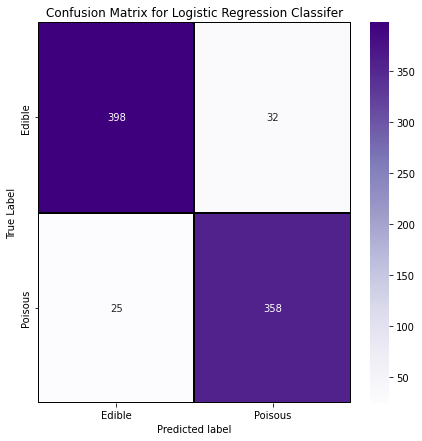

In [39]:
cm=confusion_matrix(y_test,y_pred_nb)
x_axis_labels=["Edible","Poisous"]
y_axis_labels=["Edible","Poisous"]
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor="black",
            fmt=".0f",ax=ax,cmap="Purples",xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Classifer")
plt.show()

**6. Random Forest Classification**

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=40)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


Classification Report of Random Forest Classifer

In [41]:
y_pred_rf=rf.predict(x_test)
print("Random FOrest classifier report :\n\n",classification_report(y_test,y_pred_rf))

Random FOrest classifier report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       1.00      1.00      1.00       383

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



Confusion Matrix for random forest classifier

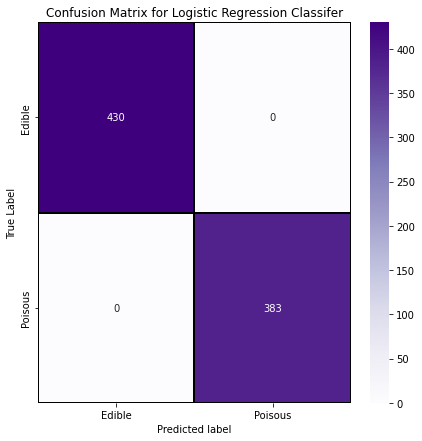

In [42]:
cm=confusion_matrix(y_test,y_pred_rf)
x_axis_labels=["Edible","Poisous"]
y_axis_labels=["Edible","Poisous"]
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.2,linecolor="black",
            fmt=".0f",ax=ax,cmap="Purples",xticklabels=x_axis_labels,
            yticklabels=y_axis_labels)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Classifer")
plt.show()

**Predictions**

In [43]:
preds=dt.predict(x_test)
print(preds[:36])
print(y_test[:36].values)
# 0 -  Edible
# 1 - Poisonous

[0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1]
[0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1]


As we can see, the predicted and the true values match 100%.
Conclusion
From the confusion matrix, we saw that our train and test data is balanced.
Most of the classification methods hit 100% accuracy with this dataset.
Woohoo! Congratulations!!! We can now eat healthy mushrooms!! YAY!